In [4]:
import scipy.linalg as sla
import numpy as np
import sympy as sy
sy.init_printing()
from matplotlib import pyplot as plt
%matplotlib inline

# curve fitting

In [5]:
m=400
x=np.linspace(-2,2,m)
a,b,c=0.5,1,-2
y_true=a+b*x+c*x**2

In [6]:
#note
# rand(m,1) <- m行1列の0から1の値をとる一様乱数
#randn(m,1)<- m行1列の標準正規分布の値を成分にもつ

In [7]:
#generate random X in [-2,2]
X=2-4*np.random.rand(m,1)
#generate Y -value and add randn noise
Y=a+b*X+c*X*X+2*np.random.randn(m,1)

In [8]:
A=np.hstack([X**0,X**1,X**2])

In [9]:
sol,r,rank,s=sla.lstsq(A,Y)

In [10]:
sol

array([[ 0.44966843],
       [ 1.01688223],
       [-1.99152264]])

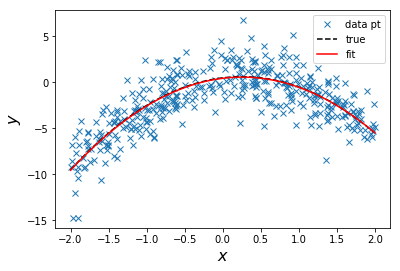

In [11]:
y_fit=sol[0]+sol[1]*x+sol[2]*x**2
fig,ax=plt.subplots()
ax.plot(X,Y,'x',label='data pt')
ax.plot(x,y_true,'k--',label='true')
ax.plot(x,y_fit,'r',label='fit')
ax.set_xlabel(r'$x$',fontsize=16)
ax.set_ylabel(r'$y$',fontsize=16)
ax.legend(loc=0)

# ムーアペンローズの擬似逆行列

In [12]:
sol=sla.pinv(A)@ Y
sol

array([[ 0.44966843],
       [ 1.01688223],
       [-1.99152264]])

# もうちょっと賢いcurve-fitting

In [13]:
from scipy.optimize import curve_fit

In [14]:
def func(x,a,b,c):
    return a+b*x+c*x**2

In [15]:
popt,pcov=curve_fit(func,X.ravel(),Y.ravel())
popt

array([ 0.44966843,  1.01688222, -1.99152264])

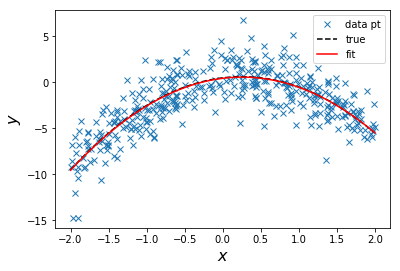

In [16]:
y_fit=popt[0]+popt[1]*x+popt[2]*x**2
fig,ax=plt.subplots()
ax.plot(X,Y,'x',label='data pt')
ax.plot(x,y_true,'k--',label='true')
ax.plot(x,y_fit,'r',label='fit')
ax.set_xlabel(r'$x$',fontsize=16)
ax.set_ylabel(r'$y$',fontsize=16)
ax.legend(loc=0)